In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification


#synthetic dataset
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1,  # adds a small amount of noise
                           class_sep=1.0,  # classes are separable but not too easily
                           random_state=40)

# relabelling y 0 to -1
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, epochs=1000, batch_size=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.batch_size = batch_size
        self.w = None
        self.b = None

    def hinge_loss(self, X, y):
        loss = np.maximum(0, 1 - y * (np.dot(X, self.w) + self.b))
        return np.mean(loss)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        losses = []

        for epoch in range(self.epochs):
            indices = np.random.permutation(n_samples)  # shuffling the data
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                grad_w = np.zeros(n_features)
                grad_b = 0

                for j in range(len(X_batch)):
                    if y_batch[j] * (np.dot(X_batch[j], self.w) + self.b) >= 1:
                        grad_w += self.lambda_param * self.w
                    else:
                        grad_w += self.lambda_param * self.w - y_batch[j] * X_batch[j]
                        grad_b += -y_batch[j]
                
                grad_w /= len(X_batch)
                grad_b /= len(X_batch)
                
                self.w -= self.lr * grad_w
                self.b -= self.lr * grad_b
            
            loss = self.hinge_loss(X, y)
            losses.append(loss)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Hinge Loss = {loss:.4f}")
        
        return self.w, self.b, losses

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# training the model
model = SVM(learning_rate=0.001, lambda_param=0.01, epochs=1000, batch_size=100)
w, b, losses = model.fit(X_train, y_train)

# making predictions
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")


Epoch 0: Hinge Loss = 0.9928
Epoch 100: Hinge Loss = 0.4692
Epoch 200: Hinge Loss = 0.3782
Epoch 300: Hinge Loss = 0.3569
Epoch 400: Hinge Loss = 0.3473
Epoch 500: Hinge Loss = 0.3404
Epoch 600: Hinge Loss = 0.3357
Epoch 700: Hinge Loss = 0.3318
Epoch 800: Hinge Loss = 0.3283
Epoch 900: Hinge Loss = 0.3254
Accuracy: 0.8500


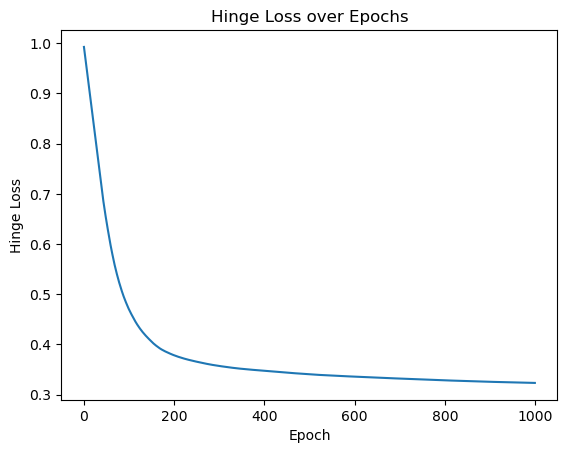

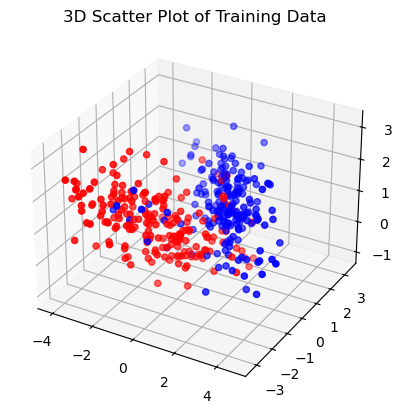

In [5]:
plt.plot(losses)
plt.title("Hinge Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Hinge Loss")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='bwr', marker='o')
ax.set_title("3D Scatter Plot of Training Data")
plt.show()


The SVM class in this case implements mini-batch gradient descent with hinge loss, L2 regularization via the lambda parameter, with a configurable learning rate, batch size and epochs. The accuracy for this model is 0.85, which is quite good, meaning that the model adapted to a good decision boundary for this dataset. 

The model is run according to the following:

1- The required python enviroment is set up, required libaries are downloaded, and then the following libraries are imported
2- A synthetic classification dataset with 3 features is used
3- The SVM class is run 
4- After training the model, predictions are made, and the accuracy of the model is determined (epochs are increased for better convergence)
5- For visualization, a graph of epoch against hinge loss is plotted, and a 3D scatter plot is produced to visualize the datapoints